In [1]:
import pymysql
import sqlalchemy
import dotenv
import os
import pandas as pd

from sqlalchemy import create_engine, text

dotenv.load_dotenv(dotenv_path="../Jupyter/.env",override=True)

username = os.getenv('username')
password = os.getenv('password')
host = os.getenv('host')
dbname = os.getenv('dbname')

conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname

db_engine =  sqlalchemy.create_engine(conn_string)

query = """SELECT *
           FROM dimcustomer"""

df = pd.read_sql(sqlalchemy.text(query), db_engine.connect())

In [2]:
df

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,None,Jon,V,Yang,0,1971-10-06,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,None,1 (11) 500 555-0162,2011-01-19,1-2 Miles
1,11001,37,AW00011001,None,Eugene,L,Huang,0,1976-05-10,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,None,1 (11) 500 555-0110,2011-01-15,0-1 Miles
2,11002,31,AW00011002,None,Ruben,None,Torres,0,1971-02-09,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,None,1 (11) 500 555-0184,2011-01-07,2-5 Miles
3,11003,11,AW00011003,None,Christy,None,Zhu,0,1973-08-14,S,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,None,1 (11) 500 555-0162,2010-12-29,5-10 Miles
4,11004,19,AW00011004,None,Elizabeth,None,Johnson,0,1979-08-05,S,...,Professional,Profesional,Cadre,1,4,7553 Harness Circle,None,1 (11) 500 555-0131,2011-01-23,1-2 Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,209,AW00029479,None,Tommy,L,Tang,0,1969-06-30,M,...,Clerical,Administrativo,Employé,1,0,"111, rue Maillard",None,1 (11) 500 555-0136,2012-09-04,0-1 Miles
18480,29480,248,AW00029480,None,Nina,W,Raji,0,1977-05-06,S,...,Clerical,Administrativo,Employé,1,0,9 Katherine Drive,None,1 (11) 500 555-0146,2013-07-17,0-1 Miles
18481,29481,120,AW00029481,None,Ivan,None,Suri,0,1965-07-04,S,...,Clerical,Administrativo,Employé,0,0,Knaackstr 4,None,1 (11) 500 555-0144,2011-08-13,0-1 Miles
18482,29482,179,AW00029482,None,Clayton,None,Zhang,0,1964-09-01,M,...,Clerical,Administrativo,Employé,1,0,"1080, quai de Grenelle",None,1 (11) 500 555-0137,2012-09-18,0-1 Miles


In [3]:

query = """SELECT *
           FROM dimproduct"""

df = pd.read_sql(sqlalchemy.text(query), db_engine.connect())
print(df.info(),"\n")
print(df.shape,"\n")
print(df.columns,"\n")
print(df.index,"\n")
print("Datatypes:\n","\n",df.dtypes,"\n")
print("PRIME 10 RIGHE:\n",df.head(10))
print("ULTIME 10 RICGHE:\n",df.tail(10))
print("5 RIGHE CASUALI:\n",df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             606 non-null    int64         
 1   ProductAlternateKey    606 non-null    object        
 2   ProductSubcategoryKey  397 non-null    float64       
 3   WeightUnitMeasureCode  282 non-null    object        
 4   SizeUnitMeasureCode    253 non-null    object        
 5   EnglishProductName     606 non-null    object        
 6   SpanishProductName     606 non-null    object        
 7   FrenchProductName      606 non-null    object        
 8   StandardCost           397 non-null    float64       
 9   FinishedGoodsFlag      606 non-null    int64         
 10  Color                  606 non-null    object        
 11  SafetyStockLevel       606 non-null    int64         
 12  ReorderPoint           606 non-null    int64         
 13  ListP

In [4]:
print("COLORI DISPONIBILI:","\n",df.loc[:,["Color"]])

COLORI DISPONIBILI: 
      Color
0       NA
1       NA
2       NA
3       NA
4       NA
..     ...
601     NA
602     NA
603  Black
604  Black
605  Black

[606 rows x 1 columns]


In [5]:
df.loc[:,["Weight"]]


,Weight
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
601,168.00
602,170.00
603,19.77
604,20.13


In [6]:
peso=df.loc[:,["Weight"]]
pesanti=peso>100
print("#media peso prodotto:",peso.mean(),"\n")
print("#più leggero:",peso.min(),"\n")
print("#più pesante:",peso.max(),"\n")
print("#olte 100kg:",pesanti.value_counts())


#media peso prodotto: Weight    56.193227
dtype: float64 

#più leggero: Weight    2.12
dtype: float64 

#più pesante: Weight    1050.0
dtype: float64 

#olte 100kg: Weight
False     578
True       28
dtype: int64


In [7]:
df_x=df["DealerPrice"].sort_index(axis=0,
                        level=None,
                        ascending=False,
                        inplace=False,
                        kind='quicksort',
                        na_position='None',
                        sort_remaining=False,
                        key=None)

df_x.dropna(how="all",axis=0)
print("25%=",df_x.count()/4,"prodotti\n")

print("il range di prezzo del primo 25% dei prodotti si aggiara tra:\n",
     df_x.max(),"e",
     df_x.min())

25%= 98.75 prodotti

il range di prezzo del primo 25% dei prodotti si aggiara tra:
 2146.962 e 1.374


In [8]:
print(df.columns)

Index(['ProductKey', 'ProductAlternateKey', 'ProductSubcategoryKey',
       'WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'EnglishProductName',
       'SpanishProductName', 'FrenchProductName', 'StandardCost',
       'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint',
       'ListPrice', 'Size', 'SizeRange', 'Weight', 'DaysToManufacture',
       'ProductLine', 'DealerPrice', 'Class', 'Style', 'ModelName',
       'LargePhoto', 'EnglishDescription', 'FrenchDescription',
       'ChineseDescription', 'ArabicDescription', 'HebrewDescription',
       'ThaiDescription', 'GermanDescription', 'JapaneseDescription',
       'TurkishDescription', 'StartDate', 'EndDate', 'Status'],
      dtype='object')


In [9]:
query = """SELECT Color,StandardCost
           FROM dimproduct
           WHERE Color='Blue'"""

df_blue = pd.read_sql(sqlalchemy.text(query), db_engine.connect())

In [10]:
print("I prodotti di colore blu in media costano:",df_blue["StandardCost"].mean().round(),"$")

I prodotti di colore blu in media costano: 528.0 $


In [11]:
query = """SELECT Color,StandardCost
           FROM dimproduct
           WHERE Color='Black' or Color='Red'"""

df_r_b = pd.read_sql(sqlalchemy.text(query), db_engine.connect())

In [12]:
print("I prodotti di colore nero e rosso, in media costano:",df_r_b["StandardCost"].mean().round(),"$")

I prodotti di colore nero e rosso, in media costano: 537.0 $


In [13]:
query = """SELECT Size, Weight,StandardCost
           FROM dimproduct
           WHERE Weight>10 and Size=42"""

df_sw = pd.read_sql(sqlalchemy.text(query), db_engine.connect())

In [14]:
print("Costo medio prodotti taglia 42, oltre i 10KG:",df_sw["StandardCost"].mean().round(),"$")

Costo medio prodotti taglia 42, oltre i 10KG: 998.0 $


In [29]:
query = """SELECT EnglishProductName,StandardCost
           FROM dimproduct
           WHERE Weight>10 and Size=42 and Color='Silver'"""

df_y = pd.read_sql(sqlalchemy.text(query), db_engine.connect())

In [30]:
df_y

,EnglishProductName,StandardCost
0,"Mountain-100 Silver, 42",1912.15
1,"Mountain-200 Silver, 42",1117.86
2,"Mountain-200 Silver, 42",1265.62
3,"Mountain-400-W Silver, 42",419.78
4,"Mountain-500 Silver, 42",308.22


In [34]:
query = """SELECT StandardCost, DealerPrice
           FROM dimproduct"""

df_diff= pd.read_sql(sqlalchemy.text(query), db_engine.connect())
print(df_diff.tail(20))

     StandardCost  DealerPrice
586        419.78      461.694
587        419.78      461.694
588        419.78      461.694
589        419.78      461.694
590        308.22      338.994
591        308.22      338.994
592        308.22      338.994
593        308.22      338.994
594        308.22      338.994
595        294.58      323.994
596        294.58      323.994
597        294.58      323.994
598        294.58      323.994
599        294.58      323.994
600         23.97       32.394
601         44.95       60.744
602         53.94       72.894
603        343.65      323.994
604        343.65      323.994
605        343.65      323.994


<Axes: >

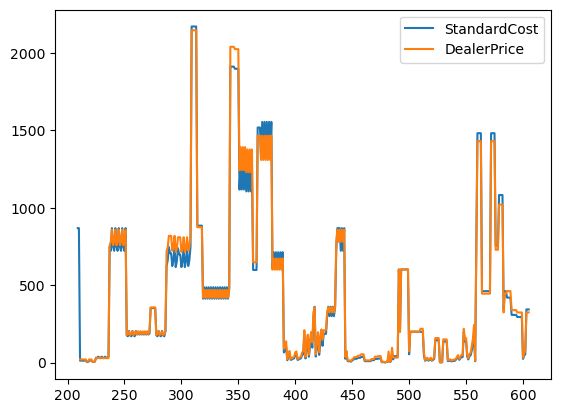

In [35]:
df_diff.plot()